In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("cs109a_hw4.ipynb")

# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science

## Milestone 3 - Saturn: EDA, Adjusted project plan and Set Goals


**Harvard University**<br/>
**Fall 2023**<br/>

**Watt\'s up with the Weather?** _Correlating City Hall's Electricity Consumption with Weather Patterns_ <br/>

**Group 34:** Robert Escudero, Sean McCabe, Yoona Kim, Lachlain McGranahan, and Calvin Beighle<br/>

**Instructors**: Pavlos Protopapas & Kevin Rader

---

In [1]:
# RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2021-CS109A/master/"
    "themes/static/css/cs109.css"
).text
HTML(styles)

#### Instructions for Milestone 3
- Summary of the Data: The EDA report should begin with a brief summary of the data. This summary should include information such as the shape of the data, data types, and descriptive statistics such as mean, max, and dtypes. Additionally, you should provide a summary of the features of the data, including histograms, correlation plots, and clustering plots.

- Deeper Understanding of the Data: While basic EDA is important, you should aim to provide a deeper understanding of the data through your analysis. This can be achieved by identifying patterns, trends, class imbalances, and outliers in the data. Additionally, explore the relationships between variables and identify any potential confounding variables that may impact the analysis.

- Meaningful Insights: The EDA report should provide meaningful insights that can be connected back to the problem at hand. These insights should be well-supported by the data and provide actionable recommendations for addressing the problem. You should focus on providing insights that are relevant to the project question and will add value to the final analysis.

- Clean and Labeled Visualization: Visualization is an important component of EDA and should be clean, labeled, and well-presented. You need to ensure that your visualizations are easy to understand and can be included in their final presentation slides or report. Anyone that reads your EDA should be able to understand what is depicted in the plots just by looking at them.

- Data Description: You should provide a detailed description of the data for your project. This should include information about the data source, the data collection process, and any preprocessing steps that were taken. Additionally, you should describe the methods you used to explore the data, including initial explorations, data cleaning, and reconciliation.

- Noteworthy Findings: Summarize the noteworthy findings of their EDA in a clear and concise manner. This can be achieved through the use of visualizations and captions that highlight the most important insights gained through the analysis.

- Project Question: Based on the insights gained through EDA, you should develop a clear project question that will guide your analysis. This question should be well-defined and specific to the problem at hand.

- Baseline Model or Implementation Plan: Finally, you should include a baseline model or a clear plan for its implementation. This can include details on the model architecture, the data used for training and validation, and the evaluation metrics used to assess model performance.

- **You should do a "Restart Kernel and Run All Cells" before submitting to ensure (1) your notebook actually runs and (2) all output is visible**

### Import Libraries

In [ ]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer, KNNImputer

# pandas tricks for better display
pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

<a id="contents"></a>

## Notebook contents

- [**PART 1 [45 pts]: Principal Componant Analysis**](#part2)
  - [Question 1: PCA for Regression [35 pts]](#part1q1)
      - [Solutions](#part1q1solution)
  - [Question 2: Visualizing Transformed Data [10 pts]](#part1q2)
      - [Solutions](#part1q2solution)
      
- [**PART 2 [55 pts]: Predicting the selling price of used cars (missing data)**](#part1)
  - [Overview and Data Description](#part1intro)
  - [Question 3: Visualizing Missing Data [10 pts]](#part2q3)
      - [Solutions](#part2q3solution)
  - [Question 4: Imputation Methods [45 pts]](#part2q4)
      - [Solutions](#part2q4solution)




<a id="part1"></a>
    
# PART 1 [45 pts]: Principal Component Analysis

[Return to contents](#contents)

<a id="part2q3"></a>

## <div class='exercise'><b> Question 1: PCA for Regression [35 pts]</b></div>

[Return to contents](#contents)
 

In this question, we will be using a dataset called "Communities and Crime" adapted from [UC Irvine Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Communities+and+Crime). The modified dataset contains 122 predictor variables and 1 response variable. All numeric data was normalized into the decimal range 0.00-1.00. Some of the predictor variables are:

- `householdsize`: mean people per household
- `medIncome`: median household income
- `PctHousOccup`: percent of housing occupied
- `RentMedian`: rental housing - median rent
- `PolicReqPerOffic`: total requests for police per police officer

And the response variable is 

- `ViolentCrimesPerPop`: total number of violent crimes per 100K popuation


In [3]:
# Load the datasets
df = pd.read_csv("data/communities_and_crime.csv", index_col = 0)
df.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,...,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.00,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,...,0.96,0.17,0.06,0.18,0.44,0.13,0.94,0.93,0.03,0.07,0.10,0.07,0.02,0.57,0.29,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14,0.20
1,0.15,0.31,0.40,0.63,0.14,0.06,0.58,0.72,0.65,0.47,0.16,1.00,0.22,0.52,0.10,0.51,0.48,0.39,0.51,0.30,0.29,0.34,0.23,0.13,0.20,...,0.93,0.38,0.05,0.21,0.23,0.30,0.61,0.89,0.15,0.01,0.06,0.12,0.10,0.64,0.22,0.06,0.39,0.84,0.06,0.06,0.91,0.5,0.88,0.26,0.49
2,0.25,0.54,0.05,0.71,0.48,0.30,0.42,0.48,0.28,0.32,0.26,1.00,0.33,0.55,0.37,0.37,0.39,0.64,0.44,0.32,0.29,0.32,0.23,0.17,0.17,...,0.96,0.12,0.05,0.11,0.35,0.08,0.80,0.82,0.04,0.19,0.19,0.18,0.05,0.57,0.36,0.09,0.46,0.05,0.09,0.05,0.88,0.5,0.76,0.13,0.34
3,1.00,0.42,0.47,0.59,0.12,0.05,0.41,0.53,0.34,0.33,1.00,0.99,0.28,0.62,0.16,0.36,0.40,0.30,0.45,0.29,0.30,0.35,0.21,0.20,0.33,...,0.75,0.19,0.35,0.19,0.38,0.16,0.82,0.70,0.45,0.03,0.05,0.33,0.13,0.57,1.00,1.00,0.07,0.15,1.00,0.35,0.73,0.0,0.31,0.21,0.69
4,0.11,0.43,0.04,0.89,0.09,0.06,0.45,0.48,0.31,0.46,0.13,1.00,0.22,0.52,0.44,0.49,0.56,0.41,0.39,0.25,0.25,0.25,0.16,0.07,0.20,...,0.98,0.14,0.03,0.14,0.37,0.11,0.84,0.96,0.00,0.00,0.00,0.00,0.02,0.86,0.29,0.16,0.12,0.07,0.04,0.01,0.81,1.0,0.56,0.09,0.63


In [4]:
# Separate predictors and response
X, y = df.drop(columns=['ViolentCrimesPerPop']), df['ViolentCrimesPerPop']
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<a id="part2q3solution"></a>
## Question 1: Solutions 

[Return to contents](#contents)

<div class='exercise-r'>

**1.1** Compute the correlation matrix for the predictor variables in the training data (DO NOT print the entire matrix). Which pairs of distinct predictor variables have correlation greater than 0.99 or less than -0.99? 
    
Store these pairs in a dictionary called `high_corr` where the keys are tuples corresponding to the names of the pair of predictors and the values are the correlation between each pair.

**Hint:** A simple method for finding the correlation matrix was demonstrated in the lab on PCA.
</div>

In [5]:
# your code here
# BEGIN SOLUTION
col_names = X_train.columns
df_corr = X_train.corr()
itemindex = np.where((df_corr > 0.99) | (df_corr < -0.99))
# this is for the sake of the assigment being shown in the student notebook
high_corr = {(col_names[i],col_names[j]): df_corr.iloc[i,j] for (i,j) in zip(itemindex[0], itemindex[1]) if i > j}
# END SOLUTION
high_corr = high_corr # SOLUTION
print("The following pairs of predictor variables have correlation greater than 0.99 or less than -0.99:")
display(high_corr)

The following pairs of predictor variables have correlation greater than 0.99 or less than -0.99:


{('numbUrban', 'population'): 0.9997647561886096,
 ('PctRecImmig5', 'PctRecentImmig'): 0.9920034327871089,
 ('PctRecImmig8', 'PctRecImmig5'): 0.9963359613654262,
 ('PctRecImmig10', 'PctRecImmig5'): 0.9900961766413996,
 ('PctRecImmig10', 'PctRecImmig8'): 0.9965871515033231,
 ('OwnOccMedVal', 'OwnOccLowQuart'): 0.9917227618576423,
 ('MedRent', 'RentMedian'): 0.9930215184921779,
 ('LemasSwFTFieldOps', 'LemasSwornFT'): -0.990313653958998,
 ('PolicPerPop', 'LemasSwFTPerPop'): 0.9999911313418828}

In [ ]:
grader.check("q1.1")

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**1.2** Fit a linear regression model on the **unscaled** training data **using all available predictors**. Store the train and test $R^2$ scores in `linreg_train_r2` and `linreg_test_r2` respectively. Interpret your results.
    
</div>

_Type your answer here, replacing this text._

In [10]:
# your code here
# BEGIN SOLUTION
lr = LinearRegression().fit(X_train, y_train)
# END SOLUTION
linreg_train_r2 = lr.score(X_train, y_train) # SOLUTION
linreg_test_r2 = lr.score(X_test, y_test) # SOLUTION
print(f"linear regression train R^2: {linreg_train_r2:.4f}")
print(f"linear regression test R^2: {linreg_test_r2:.4f}")

linear regression train R^2: 0.8461
linear regression test R^2: 0.2186


**INTERPRETATION:**

The $R^2$ score is not desirable. One reason is some predictor variables are highly correlated as indicated in the previous question. As a consequence, the estimated linear regression coefficients are not robust (i.e. they are very sensitive to small changes in the model or data), and the model does not generalize well.

In [ ]:
grader.check("q1.2")

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise-r'>


**1.3.1** Standardize both **X_train** and **X_test**, *fitting the scaler on all the data*, and for each number of components $k$ in $k \in \{1,2,3,4,5,6,8,10,12,15,20\}$: 

  - Fit the PCA transformation with n_components = $k$ on the standardized **X_train**.
    
  - Apply the PCA transformation to the standardized **X_train**.
    
  - Use scikit-learn's cross_validate(...) to perform a 10-fold cross validation for a linear regression model on the transformed training data. 
    
  Plot the mean validation MSE for each $k$. Store the best $k$ based on the mean validation MSE as `best_k`.
    
</div>

/home/chris/.local/micromamba/envs/cs109a/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/home/chris/.local/micromamba/envs/cs109a/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


The best k is 8.


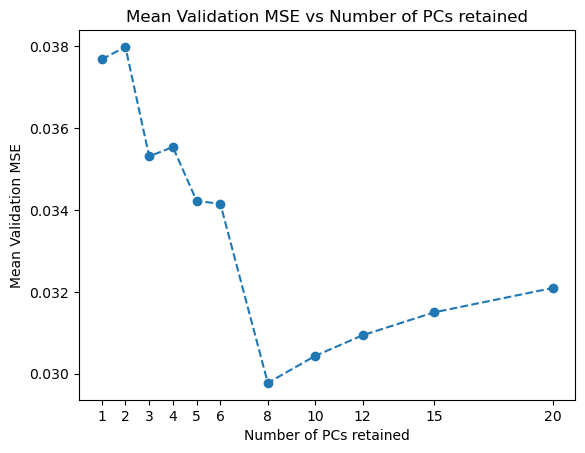

In [15]:
# your code here
# BEGIN SOLUTION
# Standardize X_train and X_test
scaler = StandardScaler().fit(np.concatenate([X_train, X_test], axis=0))
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

k_list = [1,2,3,4,5,6,8,10,12,15,20]
validation_mse_list = []

# Apply the PCA transformation
for k in k_list:
    pca = PCA(n_components=k)
    X_train_k = pca.fit_transform(X_train)
    mse_score = cross_validate(LinearRegression(), X_train_k, y_train, cv=10,\
    scoring="neg_mean_squared_error")

    validation_mse_list.append(-1*mse_score['test_score'].mean())
    
plt.plot(k_list, validation_mse_list, marker='o', ls='--')
plt.xlabel('Number of PCs retained')
plt.ylabel('Mean Validation MSE')
plt.title('Mean Validation MSE vs Number of PCs retained')
plt.xticks(k_list)
# END SOLUTION
best_k = k_list[np.argmin(validation_mse_list)] # SOLUTION
print(f"The best k is {best_k}.")

In [ ]:
grader.check("q1.3.1")

<!-- END QUESTION -->

<div class='exercise-r'>
    

**1.3.2** Now let's compute the $R^2$ value on the testing data:
  - Fit the PCA transformation on the standardized **X_train** with n_components equal to the best $k$ above.
  - Apply the PCA transformation to the standardized **X_train** and the standardized **X_test**. 
  - Fit a linear regression model to the PCA-transformed components. Store the train and test $R^2$ scores in `pcr_train_r2` and `pcr_test_r2` respectively.
    
</div>

In [18]:
# your code here
# BEGIN SOLUTION
pca = PCA(n_components=best_k)
X_train_k = pca.fit_transform(X_train)
X_test_k = pca.transform(X_test)
pcr = LinearRegression().fit(X_train_k, y_train)
# END SOLUTION
pcr_train_r2 = pcr.score(X_train_k, y_train) # SOLUTION
pcr_test_r2 = pcr.score(X_test_k, y_test) # SOLUTION
print(f"PCR train R^2: {pcr_train_r2:.4f}")
print(f"PCR test R^2: {pcr_test_r2:.4f}")

PCR train R^2: 0.6377
PCR test R^2: 0.6858


In [ ]:
grader.check("q1.3.2")

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**1.4** Compare the $R^2$ value obtained from **3.2** (original predictors) and **3.3.2** (PCR). Provide an explanation for the observed difference in these results.
    
</div>

In [23]:
# Display your results
pd.DataFrame([
    {'model': 'linear regression (original predictors)',
     'train $R^2$': linreg_train_r2,
     'test $R^2$': linreg_test_r2},
    {'model': f'PCR (k={best_k})',
     'train $R^2$': pcr_train_r2,
     'test $R^2$': pcr_test_r2},
]).set_index('model')

,train $R^2$,test $R^2$
model,,
linear regression (original predictors),0.846,0.219
PCR (k=8),0.638,0.686


_Type your answer here, replacing this text._

The $R^2$ value obtained from **3.3.2** is much larger than that from **3.2**. By excluding the principal components corresponding to these small eigenvalues, the PCR model effectively addressed the multicollinearity issue mentioned in **3.2**.


<!-- END QUESTION -->

<a id="part1q2"></a>

## <div class='exercise'><b> Question 2: Visualizing Transformed Data [10 pts]</b></div>

[Return to contents](#contents)

In this question, we will be using a dataset called "Better Life Index" adapted from [Organisation for Economic Co-operation and Development](https://stats.oecd.org/). The modified dataset contains 24 numerical variables and 1 categorical variable. The categorical variable `Country` is the name of the country. Some of the numerical variables include:

- `Dwellings without basic facilities`
- `Housing expenditure`
- `Rooms per person`
- `Household net adjusted disposable income`
- `Household net financial wealth`
- ...

In [24]:
# Load and inspect the datasets
df = pd.read_csv("data/OECD_well-being.csv", index_col = 0)
print('df shape:', df.shape)
df.head()

df shape: (38, 25)


,Country,Dwellings without basic facilities,Housing expenditure,Rooms per person,Household net adjusted disposable income,Household net financial wealth,Labour market insecurity,Employment rate,Long-term unemployment rate,Personal earnings,Quality of support network,Educational attainment,Student skills,Years in education,Air pollution,Water quality,Stakeholder engagement for developing regulations,Voter turnout,Life expectancy,Self-reported health,Life satisfaction,Feeling safe walking alone at night,Homicide rate,Employees working very long hours,Time devoted to leisure and personal care
0,Australia,1.1,20,2.3,33417,57462,4.3,72,1.36,52063,94,80,502,21.2,5,92,2.7,91,82.5,85,7.3,63.6,1.0,13.20,14.35
1,Austria,1.0,21,1.6,32544,59574,2.7,72,1.94,48295,92,85,492,17.1,16,93,1.3,75,81.3,70,7.0,80.7,0.4,6.78,14.55
2,Belgium,2.3,21,2.2,29968,104084,4.8,62,3.98,49587,92,75,503,18.2,15,84,2.2,89,81.1,75,6.9,70.7,1.0,4.31,15.77
3,Canada,0.2,22,2.5,29850,85758,3.9,73,0.81,48403,93,91,523,16.7,7,91,3.0,68,81.5,88,7.3,80.9,1.4,3.73,14.41
4,Chile,9.4,18,1.9,16588,21409,8.1,62,2.02,28434,84,65,443,17.3,16,69,1.5,49,79.1,57,6.7,51.1,4.5,10.06,14.90


In [25]:
# Separate predictors and response
country, X = df['Country'], df.drop(columns='Country').values

<div class='exercise-r'>

**2.1** Standardize **X** and apply a PCA transformation with n_components = 2 to your standardized data. Save the transformed data as `X_transformed`.
    
</div>


In [26]:
# BEGIN SOLUTION
scaler = StandardScaler()
X_std= scaler.fit_transform(X)

pca = PCA(n_components=2)
# END SOLUTION
X_transformed = pca.fit_transform(X_std) # SOLUTION

In [ ]:
grader.check("q2.1")

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**2.2** Make a scatter plot for the transformed data, where the x-axis corresponds to the first principal component, and the y-axis corresponds to the second principal component. The plot should state the amount of variance explained by each component. 

Label each point by its corresponding country name. Do you observe any pattern in the scatter plot? Be specific and explain.
    
</div>

_Type your answer here, replacing this text._

Text(0.5, 1.0, 'Data Projected onto the Top Two PCs')

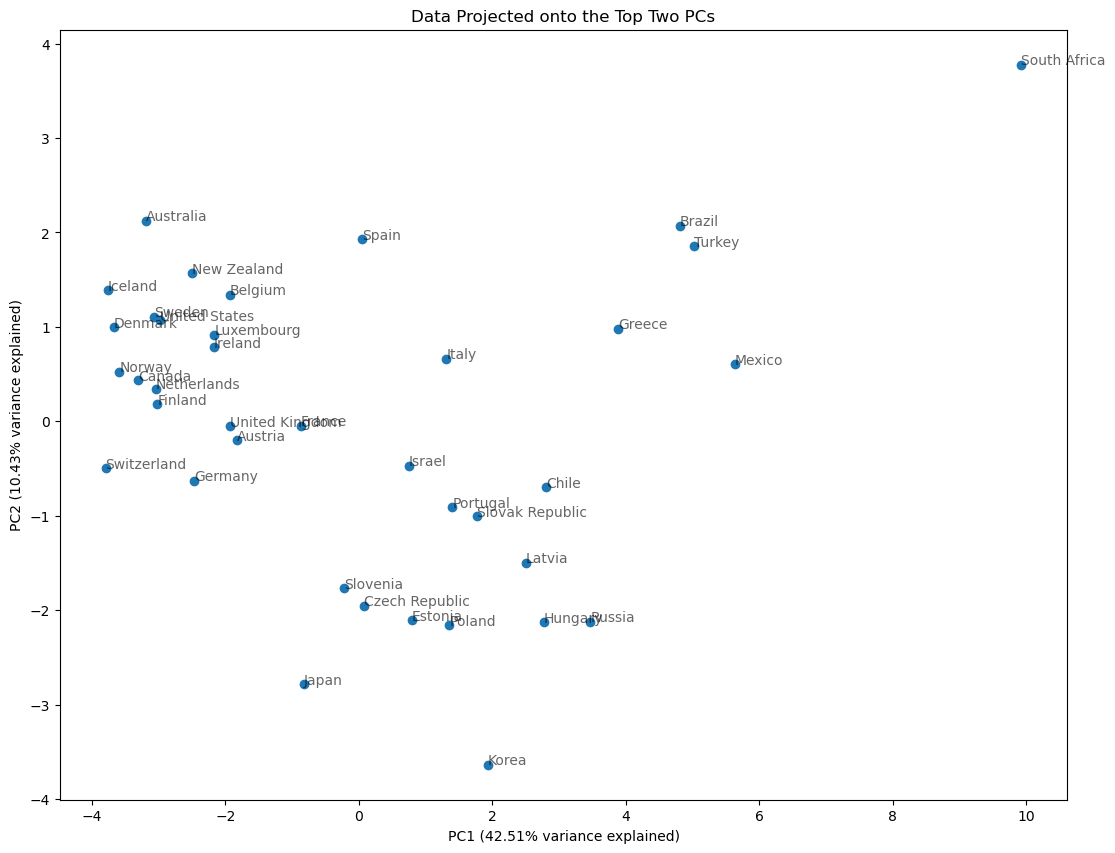

In [30]:
# BEGIN SOLUTION
plt.figure(figsize=(13,10))
plt.scatter(X_transformed[:,0],X_transformed[:,1])
for i, txt in enumerate(country):
        plt.annotate(txt, (X_transformed[i,0],X_transformed[i,1]), alpha=0.6)
pca1_var = pca.explained_variance_ratio_[0]
pca2_var = pca.explained_variance_ratio_[1]
plt.xlabel(f'PC1 ({pca1_var:.2%} variance explained)')
plt.ylabel(f'PC2 ({pca2_var:.2%} variance explained)')
plt.title('Data Projected onto the Top Two PCs')
# END SOLUTION

**INTERPRETATION:**

Countries with close geographical distance (such as Australia & New Zealand, Japan & Korea, Slovenia & Czech Republic) tend to be clusttered together in the plot. More generally, countries within the same continent tend to be clusttered together. This may be because the life conditions in nearby countries tend to be similar. Though some of the captured similarities may have to do with climate rather than geographic proximity. This might explain, for example, Canada's being tightly clustered with Norway and Finland. Though none of this would explain why Brazil and Turkey are so close in the 2-D PCA space.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**2.3** In question 1, where we also used PCA, we had a training and a test set. In question 2 we did not split the data. Explain why.
    
</div>

_Type your answer here, replacing this text._

**INTERPRETATION:**

In Exercise 3 we run a prediction model on data transformed by PCA. While the PCA transformation itself did not need a separate train and test set, the modeling did. In Exercise 4 we try to uncover hidden patterns in the data. This is a case of unsupervised learning.

<!-- END QUESTION -->

<a id="part2"></a>
    
# PART 2 [55 pts]: Predicting the selling price of used cars (missing data)

[Return to contents](#contents)

<a id="part1intro"></a>

## Overview and Data Description 

[Return to contents](#contents)

In this part, we analyze the data about used cars from a [Kaggle project](https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho). The dataset is pre-processed and modified so that it contains missing values. The goal is to handle missing data and predict selling prices from the other features available in this dataset.

### Dataset 

The training dataset is available as `data/vehicle_dataset_train.csv`. It contains the following columns:

- `year` - year of the car when it was bought, 
- `mileage` - mileage of the car,
- `max_power` - maximum power of the engine (in bhps),
- `selling_price` - price at which the car is being sold (in lakh rupees)

The testing dataset is available as `data/vehicle_dataset_test.csv`. It contains all columns mentioned above.


### Objective

We will handle missing data and predict `selling_price` from the other features available in this dataset.

<a id="part1q1"></a>

## <div class='exercise'><b>Question 3: Visualizing Missing Data [10 pts]</b></div>

[Return to contents](#contents)

**PLEASE NOTE:** In this course, you will be expected to ALWAYS label your axes, title your graphs, and produce visuals which clearly communicate the data (as described in the [Instructions](#instructions) at the start of this notebook). Visuals should often be accompanied by text identifying the key point of the visual and defending any choices you make as a data scientist regarding the visual to best communicate your data.

In [31]:
# Load the datasets
df_train = pd.read_csv("data/vehicle_dataset_train.csv", index_col=0)
df_test = pd.read_csv("data/vehicle_dataset_test.csv", index_col=0)
df_train.head(5)

,year,mileage,max_power,selling_price
6601,2015,17.40,117.30,70.0
504,2017,13.60,NaN,262.5
5812,2018,24.00,73.97,71.0
1443,2009,19.70,46.30,15.0
7453,2014,16.02,NaN,42.5


In [32]:
# Separate predictors from responsess
X_train, y_train = df_train.drop(columns=['selling_price']), df_train['selling_price']
X_test, y_test = df_test.drop(columns=['selling_price']), df_test['selling_price']

<div class='exercise-r'>

**Q3.1** Let's explore the extent of the missingness in the train data:

- store the number of rows with missing values in `n_rows_with_missingness`
- store the number of columns with missing values in `n_columns_with_missingness`
- Create a Pandas Series where the indices are the column names of `X_train` and the values are the number of missing data entries in the corresponding column in `X_train`. Store this series in `col_missingness`

**Hint:** The Pandas `isna()` method is very helpful. Keep in mind that, when doing arithmetic with boolean values, `True` evaluates to `1` and `False` evaluates to `0`. With this knowledge, how might you use methods like `sum()` and `max()` along specific axes of a data matrix to answer questions about missingness?
</div> 

In [33]:
n_rows_with_missingness = X_train.isna().max(axis=1).sum() # SOLUTION
n_cols_with_missingness = X_train.isna().max(axis=0).sum() # SOLUTION
col_missingness = X_train.isna().sum(axis=0) # SOLUTION

In [34]:
# display your results with this code
print('# rows with missingness:', n_rows_with_missingness)
print('# columns with missingness:', n_cols_with_missingness)
print(f'\ncolumns with missingness:\n{col_missingness}')

# rows with missingness: 44
# columns with missingness: 1

columns with missingness:
year          0
mileage       0
max_power    44
dtype: int64


In [ ]:
grader.check("q3.1")

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**3.2** Generate a boxplot of `year` for all samples that have missing values. In the same plot, generate another boxplot of `year` for all samples that do not have missing values. Do you see any pattern?  If so, what might be the implications of that pattern? 

</div> 

_Type your answer here, replacing this text._

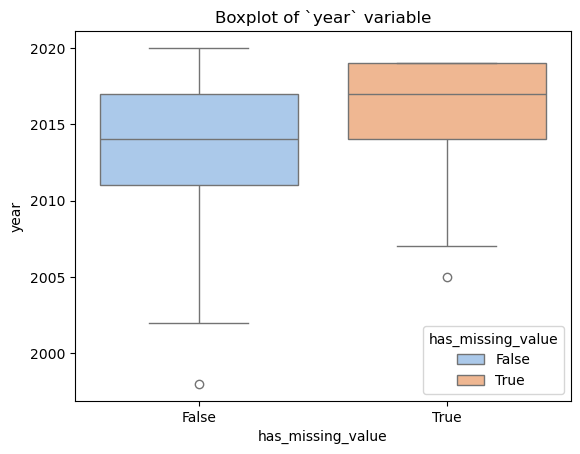

In [41]:
# your code here
# BEGIN SOLUTION
X_train_new = X_train.copy()
X_train_new['has_missing_value'] = X_train_new['max_power'].isna()

fig, ax = plt.subplots()
sns.boxplot(data=X_train_new, x = 'has_missing_value', hue = 'has_missing_value', y='year', palette = 'pastel')
plt.title('Boxplot of `year` variable')
plt.ylabel('year');
# END SOLUTION

**INTERPRETATION:**

For observation that have missing values, `year` tend to be larger on average than for those observations without missing values. This suggests that the data is not missing completely at random.


<!-- END QUESTION -->

<a id="part1q2"></a>

## <div class='exercise'><b> Question 4:   Imputation Methods [45 pts]</b></div>

[Return to contents](#contents)

We will try different ways of dealing with missing data. Take care not to overwrite the original `X_train` and `X_test` as we'll want to use them each time we try a new imputation method.

<div class='exercise-r'>

    

**4.1** First, we consider mean imputation:
  - Use SimpleImputer to impute the mean of observed `max_power` values in the training dataset for both **X_train** and **X_test**. 
  - Fit a linear regression model and store its $R^2$ score on the test data in `linreg_meanimp_r2`
  - Fit a k-NN regression model ($k$=2) store its $R^2$ score on the test data in `knn_meanimp_r2` 
    
**NOTE:** For the sake of consistency, we will used standardized data throughout question 2 (consider why this is necessary for at least some of our models and imputation methods). Note that we are fitting our scaler on *all* the data (train + test).
    
</div>

In [42]:
scaler = StandardScaler().fit(np.concatenate([X_train.values, X_test.values], axis=0))
X_train_scaled = scaler.transform(X_train.values)
X_test_scaled = scaler.transform(X_test.values)
# Add back column names lost during scaling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [43]:
# your code here
# BEGIN SOLUTION
imputer = SimpleImputer(strategy='mean')
X_train_1 = imputer.fit_transform(X_train_scaled)
X_test_1 = imputer.transform(X_test_scaled)
    
def get_R_squared(X_train, y_train, X_test, y_test):
    reg_model = LinearRegression().fit(X_train, y_train)
    reg_y_pred = reg_model.predict(X_test)
    reg_r2_score = r2_score(y_test, reg_y_pred)
    print(f"Test R^2 score for linear regression model is {reg_r2_score:.4f}")
    knn_model = KNeighborsRegressor(n_neighbors=2).fit(X_train, y_train)
    knn_y_pred = knn_model.predict(X_test)
    knn_r2_score = r2_score(y_test, knn_y_pred)
    print(f"Test R^2 score for knn model is {knn_r2_score:.4f}")
    return reg_r2_score, knn_r2_score

linreg_meanimp_r2, knn_meanimp_r2 = get_R_squared(X_train_1, y_train, X_test_1, y_test)
# END SOLUTION

Test R^2 score for linear regression model is 0.1894
Test R^2 score for knn model is 0.4008


In [ ]:
grader.check("q4.1")

<div class='exercise-r'>

**4.2** Now, we will impute the data using k-NN regression model and see how it works:
  - Use KNNImputer ($k$=2) to impute both **X_train** and **X_test**.
  - Fit a linear regression model and store its $R^2$ score on the test data in `linreg_knnimp_r2`
  - Fit a k-NN regression model ($k$=2) store its $R^2$ score on the test data in `knn_knnimp_r2` 
</div>

In [49]:
# your code here
# BEGIN SOLUTION
knn_imputer = KNNImputer(n_neighbors=2)
X_train_2 = knn_imputer.fit_transform(X_train_scaled)
X_test_2 = knn_imputer.transform(X_test_scaled)
linreg_knnimp_r2, knn_knnimp_r2 = get_R_squared(X_train_2, y_train, X_test_2, y_test)
# END SOLUTION

Test R^2 score for linear regression model is 0.2046
Test R^2 score for knn model is 0.6222


In [ ]:
grader.check("q4.2")

<div class='exercise-r'>

    
**4.3** Now, let's examine the indicator method:
  - For both the training and testing data, create an additional predictor called `has_missing_value` that indicates whether each row has any missing value.
  - Impute the mean of observed `max_power` values in the training dataset for both **X_train** and **X_test**.
  - Fit a linear regression model and store its $R^2$ score on the test data in `linreg_indic_r2`
  - Fit a k-NN regression model ($k$=2) store its $R^2$ score on the test data in `knn_indic_r2` 
    
</div>

In [55]:
# your code here
# BEGIN SOLUTION
X_train_3, X_test_3 = X_train_scaled.copy(), X_test_scaled.copy()

X_train_3['has_missing_value'] = (X_train_3['max_power'].isna()).astype(int)
X_test_3['has_missing_value'] = (X_test_3['max_power'].isna()).astype(int)

imputer = SimpleImputer(strategy='mean')
X_train_3 = imputer.fit_transform(X_train_3)
X_test_3 = imputer.transform(X_test_3)

# print_R_squared(X_train_3, y_train, X_test_3, y_test)
linreg_indic_r2, knn_indic_r2 = get_R_squared(X_train_3, y_train, X_test_3, y_test)
# END SOLUTION

Test R^2 score for linear regression model is 0.3948
Test R^2 score for knn model is 0.6526


In [56]:
lr = LinearRegression().fit(X_train_3, y_train)
knn = KNeighborsRegressor(2).fit(X_train_3, y_train)
linreg_indic_r2 = lr.score(X_test_3, y_test)
knn_indic_r2 = knn.score(X_test_3, y_test)
linreg_indic_r2, knn_indic_r2

(0.3947819661877332, 0.6526087652488712)

In [ ]:
grader.check("q4.3")

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**4.4** Compare the $R^2$ values from **4.1 - 4.3**. Does adding an indicator variable help? Do these indicator method results provide any support **for** or **against** a claim that the data is missing completely at random? Why or why not?
    
</div>

In [61]:
# Display your results
pd.DataFrame([
    {'missingness approach': 'mean imputation',
     'linreg test $R^2$': linreg_meanimp_r2,
     'knn test $R^2$': knn_meanimp_r2},
    {'missingness approach': 'knn imputation',
     'linreg test $R^2$': linreg_knnimp_r2,
     'knn test $R^2$': knn_knnimp_r2},
    {'missingness approach': 'missingness indicator + mean imputation',
     'linreg test $R^2$': linreg_indic_r2,
     'knn test $R^2$': knn_indic_r2}, 
]).set_index('missingness approach')

,linreg test $R^2$,knn test $R^2$
missingness approach,,
mean imputation,0.189,0.401
knn imputation,0.205,0.622
missingness indicator + mean imputation,0.395,0.653


_Type your answer here, replacing this text._

*your answer here*

Adding an indicator variable significantly increases the $R^2$ score for the linear regression model, which suggests the data is probably not missing completely at random. If the data is completely missing at random, then adding an indicator variable should not help significantly improve any method.,

We also observe that adding an indicator variable does not significantly improve the kNN regression model. One possible reason is that the missingness is a nonlinear function of the other features, and adding an indicator variable provides redundant information for the kNN model but not for the linear regression model.

<!-- END QUESTION -->

**This concludes HW4. Thank you!**

[Return to contents](#contents)